In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('dark_background')



file_path = '/content/drive/My Drive/Colab Notebooks/iris.data'
df = pd.read_csv(file_path, header=None)


df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'flower_type']

print(df.head())

   sepal_length  sepal_width  petal_length  petal_width  flower_type
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


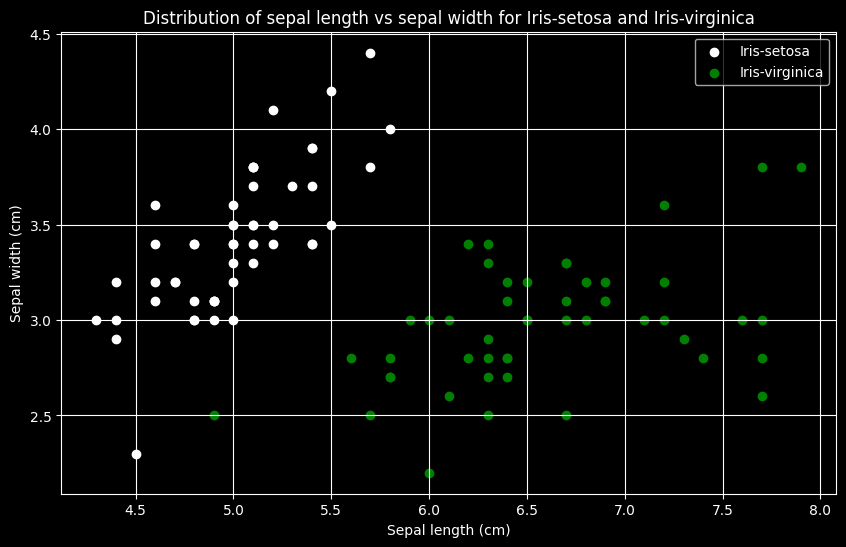

In [ ]:
segregate_df = df[(df['flower_type'] == 'Iris-setosa') | (df['flower_type'] == 'Iris-virginica')] #only Iris-setosa and Iris-virginica

plt.figure(figsize=(10, 6)) #plotting the data distribution for the chosen features

for label, color in zip(['Iris-setosa', 'Iris-virginica'], ['white', 'green']):
    subset = segregate_df[segregate_df['flower_type'] == label]
    plt.scatter(subset['sepal_length'], subset['sepal_width'], label=label, color=color)

plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.title('Distribution of sepal length vs sepal width for Iris-setosa and Iris-virginica')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
split_df = segregate_df.sample(frac=1, random_state=42).reset_index(drop=True) #shuffling the dataset first

setosa_df = split_df[split_df['flower_type'] == 'Iris-setosa'] #separating the data
virginica_df = split_df[split_df['flower_type'] == 'Iris-virginica']

train_ratio = 0.8
number_train_setosa = int(len(setosa_df) * train_ratio)
number_train_virginica = int(len(virginica_df) * train_ratio)
train_setosa = setosa_df.iloc[:number_train_setosa] #splitting into train and test
test_setosa = setosa_df.iloc[number_train_setosa:]
train_virginica = virginica_df.iloc[:number_train_virginica]
test_virginica = virginica_df.iloc[number_train_virginica:]
train_df = pd.concat([train_setosa, train_virginica]).sample(frac=1, random_state=42).reset_index(drop=True)
test_df = pd.concat([test_setosa, test_virginica]).sample(frac=1, random_state=42).reset_index(drop=True)

X_train = train_df[['sepal_length', 'sepal_width']].values #extracting features and labels for training and testing

y_train = train_df['flower_type'].apply(lambda x: 0 if x == 'Iris-setosa' else 1).values

X_test = test_df[['sepal_length', 'sepal_width']].values
y_test = test_df['flower_type'].apply(lambda x: 0 if x == 'Iris-setosa' else 1).values

print("Class Distribution in Training Set:") #printing the distributions
print(train_df['flower_type'].value_counts(normalize=True) * 100)

print("\nClass Distribution in Test Set:")
print(test_df['flower_type'].value_counts(normalize=True) * 100)

Class Distribution in Training Set:
flower_type
Iris-setosa       50.0
Iris-virginica    50.0
Name: proportion, dtype: float64

Class Distribution in Test Set:
flower_type
Iris-setosa       50.0
Iris-virginica    50.0
Name: proportion, dtype: float64


In [ ]:
def sigmoid(z): #sigmoid function
    return 1 / (1 + np.exp(-z))

def compute_cost(X, y, weights, bias): # cost function for loss
    m = len(y)
    z = np.dot(X, weights) + bias
    predictions = sigmoid(z)
    epsilon = 1e-15 # this is to avoid log0
    predictions = np.clip(predictions, epsilon, 1 - epsilon)
    cost = -(1 / m) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
    return cost

def predict(X, weights, bias, threshold=0.5): #predict function
    z = np.dot(X, weights) + bias
    probabilities = sigmoid(z)
    return [1 if i > threshold else 0 for i in probabilities]

weights = np.zeros(X_train.shape[1]) #initializing weights and the bias
bias = 0
learning_rate = 0.01
epochs = 10000
cost_history = []
train_accuracies = []

In [ ]:
for epoch in range(epochs): #gradient descent
    z = np.dot(X_train, weights) + bias #computer and apply sigmoid function for predictions
    predictions = sigmoid(z)

    m = len(y_train) #computing gradients for weights and bias
    dw = (1 / m) * np.dot(X_train.T, (predictions - y_train))
    db = (1 / m) * np.sum(predictions - y_train)

    weights -= learning_rate * dw #updating the weights and the bias using gradient descent
    bias -= learning_rate * db

    if epoch % 100 == 0: #calculating cost for every 100 epochs
        cost = compute_cost(X_train, y_train, weights, bias)
        cost_history.append(cost)

    y_prediction_train = [1 if i > 0.5 else 0 for i in predictions] #training accuracy at each epoch
    train_accuracy = np.mean(y_prediction_train == y_train) * 100
    train_accuracies.append(train_accuracy)

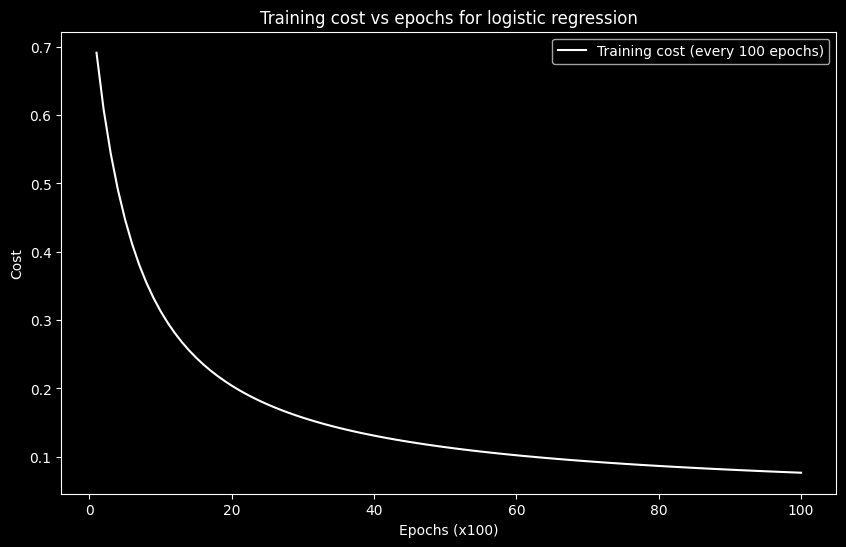

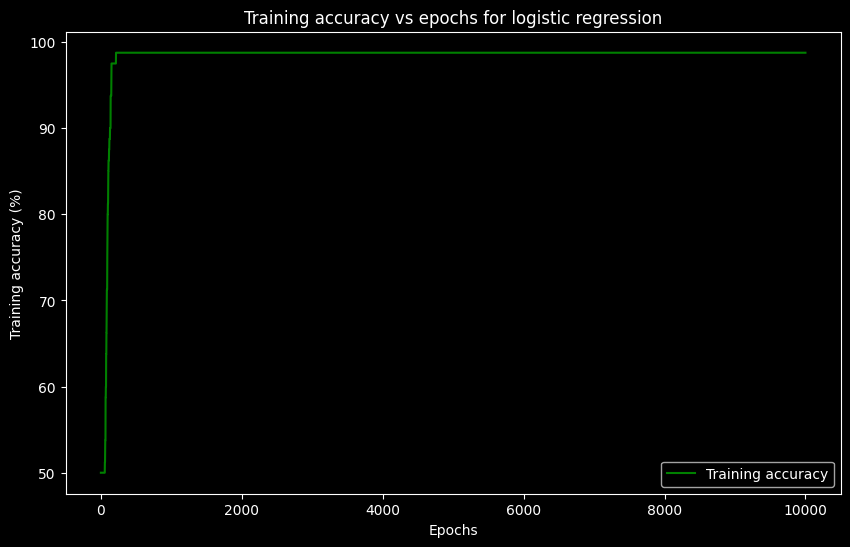

In [ ]:
plt.figure(figsize=(10, 6)) #plotting cost vs epochs
plt.plot(range(1, len(cost_history) + 1), cost_history, label='Training cost (every 100 epochs)', color='white')
plt.xlabel('Epochs (x100)')
plt.ylabel('Cost')
plt.title('Training cost vs epochs for logistic regression')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6)) #pllotting training accuracy vs epochs
plt.plot(range(1, epochs + 1), train_accuracies, label='Training accuracy', color='green')
plt.xlabel('Epochs')
plt.ylabel('Training accuracy (%)')
plt.title('Training accuracy vs epochs for logistic regression')
plt.legend()
plt.show()

In [ ]:
print(f"Final weights: {weights}") #print final weight
print(f"Final bias: {bias}") #print final bias
y_prediction_test = predict(X_test, weights, bias) #prediction using the trained weights and bias on the test data
test_accuracy = np.mean(y_prediction_test == y_test) * 100 #calculating the test accuracy
print(f'Test accuracy: {test_accuracy:.2f}%')

Final weights: [ 2.91931154 -4.8516088 ]
Final bias: -1.2049989272612314
Test accuracy: 100.00%
